#### Smile On 60+ is a statewide initiative in Tennessee with the goal of improving the overall health of low-income, mobile seniors age 60+ through access to oral healthcare services and community education.

More information can be found:
https://www.tn.gov/aging/administration/seniortrust-eldertrust.html
https://interfaithdentalclinic.com/smile-on-60/

___Data Questions
For this project you are tasked with using this data to determine the effectiveness of Smile On. Use the data provided to answer these questions:

1. Who has Smile On been serving (number of patients, age, gender, etc.)?
2. Explore the impact of the Smile On program and the outcomes that are produced for clients. Are clients seeing improvement through the Smile On program?
3. Is there any correlation between procedures given and improved outcomes?

Beyond the questions outlined above, you are encouraged to continue to explore the data to understand the effectiveness of the Smile On program and to try and see how different factors can impact the clinical results (eg. how do transportation options for clinics affect outcomes?).

__Smile On Data
Information about patients is gathered during different interactions (initial visit, checkups, etc.). The data you have been given include records spanning from May of 2018 through September of 2021. There is also a data dictionary that contains some useful information about the different columns.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df= pd.read_csv(r"C:\Users\jojuk\Documents\git\projects\smile-on-get_tootha_choppa\data\Smileon.csv")

C:\Users\jojuk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,32,36,53,58,59,77,83,89,93,105,127,141,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**Creating a subset datframe using elgibility questions

In [3]:
df_elig = df[['SMILE ON 60+ Presumptive Eligibility - Dental Insurance?', 
              'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?',
              'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter, A?', 
              'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter, B?']]

**Renaming existing csv column headers

In [4]:
df_elig = df_elig.rename(columns={'SMILE ON 60+ Presumptive Eligibility - Dental Insurance?': 'elig_Insurance', 'SMILE ON 60+ Presumptive Eligibility - Do they pre-qualify for SMILE ON 60+?': 'elig_Prequalify', 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter, A?': 'elig_NextStepsA' , 'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter, B?': 'elig_NextStepsB'})
df_elig

,elig_Insurance,elig_Prequalify,elig_NextStepsA,elig_NextStepsB
0,No,Yes,Continued with Navigation,NaN
1,No,Yes,Continued with Navigation,NaN
2,No,Yes,NaN,Continued with Navigation
3,No,Yes,NaN,Continued with Navigation
4,No,Yes,NaN,Continued with Navigation
...,...,...,...,...
57855,No,Yes,NaN,Continued with Navigation
57856,No,Yes,NaN,Continued with Navigation
57857,NaN,NaN,NaN,NaN
57858,No,Yes,Continued with Navigation,NaN


In [5]:
df_elig.replace(np.nan, 10, inplace=True) #REPLACING ALL NAN VALUES WITH 10

In [6]:
df_elig.shape

(57860, 4)

In [7]:
df_elig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   elig_Insurance   57860 non-null  object
 1   elig_Prequalify  57860 non-null  object
 2   elig_NextStepsA  57860 non-null  object
 3   elig_NextStepsB  57860 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


**To find the number of missing values, as a percentage of each column, in the data set- first 100 rows

In [8]:
import numpy as np
for col in df_elig.columns:
    pct_missing = np.mean(df_elig[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

elig_Insurance - 0%
elig_Prequalify - 0%
elig_NextStepsA - 0%
elig_NextStepsB - 0%


**Missing Data Heatmap - yellow indicates missing data, y axis shows number of missing observations

<AxesSubplot:>

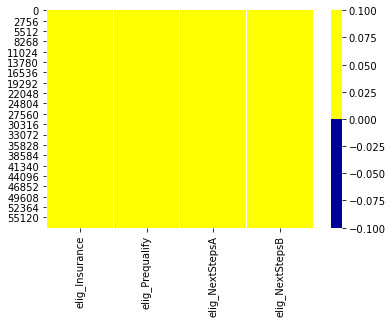

In [9]:
import seaborn as sns
figsize=(20,20)
cols = df_elig.columns[:50]
colours = ['#000099', '#ffff00']
sns.heatmap(df_elig[cols].isnull(), cmap=sns.color_palette(colours))

**Duplicates based on  Key Features - removes duplicate data based on a set of unique identifiers

In [10]:
#pd.reset_option('display.float_format')
df_elig.describe()

,elig_Insurance,elig_Prequalify,elig_NextStepsA,elig_NextStepsB
count,57860,57860,57860,57860
unique,3,3,4,4
top,No,Yes,10,Continued with Navigation
freq,53131,51555,41141,37304


In [11]:
df_elig['elig_Insurance'].value_counts()

No     53131
10      3539
Yes     1190
Name: elig_Insurance, dtype: int64

In [12]:
df_elig['elig_Insurance'].unique()

array(['No', 10, 'Yes'], dtype=object)

In [13]:
df_elig['elig_Prequalify'].value_counts()

Yes    51555
10      4463
No      1842
Name: elig_Prequalify, dtype: int64

In [14]:
df_elig['elig_Prequalify'].unique()

array(['Yes', 10, 'No'], dtype=object)

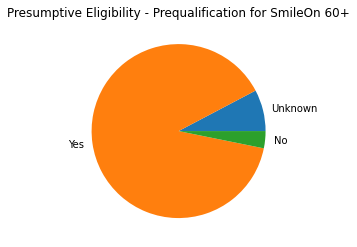

In [15]:
import matplotlib.pyplot as plt
y = np.array([7.71, 89.10, 3.18])
mylabels = ["Unknown", "Yes", "No"]
plt.title("Presumptive Eligibility - Prequalification for SmileOn 60+")
plt.pie(y, labels = mylabels)
plt.show() 

In [16]:
df_elig['elig_NextStepsA'].value_counts()

10                                  41141
Continued with Navigation           15323
No further questions from client     1286
Refer to Health Match                 110
Name: elig_NextStepsA, dtype: int64

In [17]:
df_elig['elig_NextStepsA'].unique()

array(['Continued with Navigation', 10,
       'No further questions from client', 'Refer to Health Match'],
      dtype=object)

In [18]:
df_elig['elig_NextStepsB'].value_counts()

Continued with Navigation           37304
10                                  19746
No further questions from client      727
Refer to Health Match                  83
Name: elig_NextStepsB, dtype: int64